In [302]:
#0) Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1)Reading the data and checking the first rows etc...
medinsurance_data = pd.read_csv('/content/insurance.csv')
medinsurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [303]:
medinsurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [258]:
medinsurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [304]:
#basic stat of data
medinsurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [305]:
#Checking for missing data
medinsurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

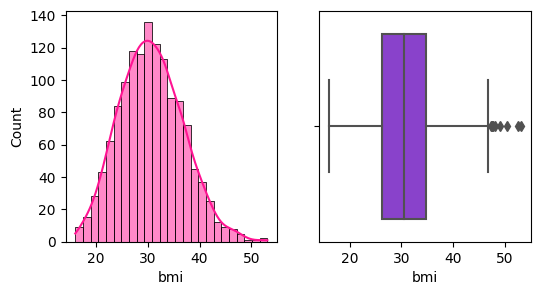


***Median of bmi is  30.4 .


In [306]:
#2)Analysis through visualization

# BMI Distribution
fig, axes = plt.subplots(1,2,figsize=(6,3))
sns.histplot(medinsurance_data['bmi'], kde = True, color='deeppink', ax=axes[0])
sns.boxplot(x='bmi',data=medinsurance_data,color='blueviolet', ax=axes[1])
plt.show()
#We can see outliers after 48 bmi, bmi median is  around 30.
median = np.median(medinsurance_data['bmi'])
print()
print('***Median of bmi is ', median,'.')

In [308]:
#using basic stat values from before to find boxstat limits of bmi and outliers
q3 = 34.693750
q1 = 26.296250
iqr = q3 - q1
upper = q3 + iqr*1.5
lower = q1 - iqr*1.5
print('iqr ', iqr, '--- upper', upper, '--- lower', lower)
data=medinsurance_data['bmi']
outliers = data[(data<lower)|(data>upper)]
print()
print('***OUTLIERS***')
print(outliers)

iqr  8.3975 --- upper 47.290000000000006 --- lower 13.7

***OUTLIERS***
116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64


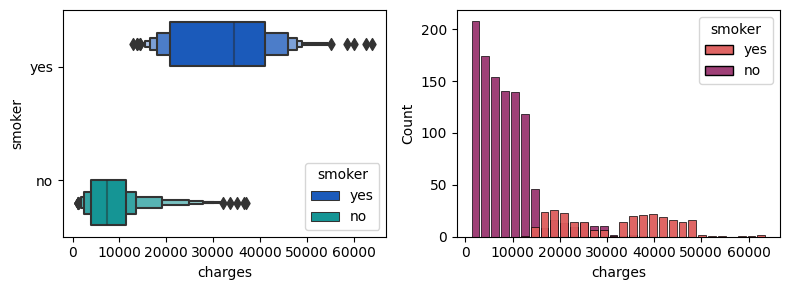

In [309]:
#Charges of Smoker and Non-smoker Clients

f, axis = plt.subplots(1, 2, figsize=(8,3))
sns.boxenplot(data = medinsurance_data, x='charges', y='smoker', hue = 'smoker', palette='winter' , ax=axis[0])
sns.histplot(data = medinsurance_data, x='charges',  hue='smoker',shrink=0.8, alpha=0.95, palette='flare', ax=axis[1])
f.tight_layout()

#We can see that average charge of non-smoker clients are much lower than smokers.
#Average charges of smokers varies between 2000-4000, whereas
# non-smokers have much lower averages, almost the half of smoker charges.


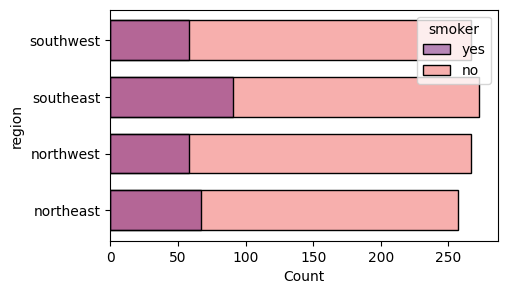

In [311]:
#Smokers According to Different Regions
#there doesn't seem to be correlation between smoking and region
plt.figure(figsize=(5,3))
sns.histplot(data = medinsurance_data, y ='region', shrink=0.7, hue='smoker', palette='magma')
plt.show()

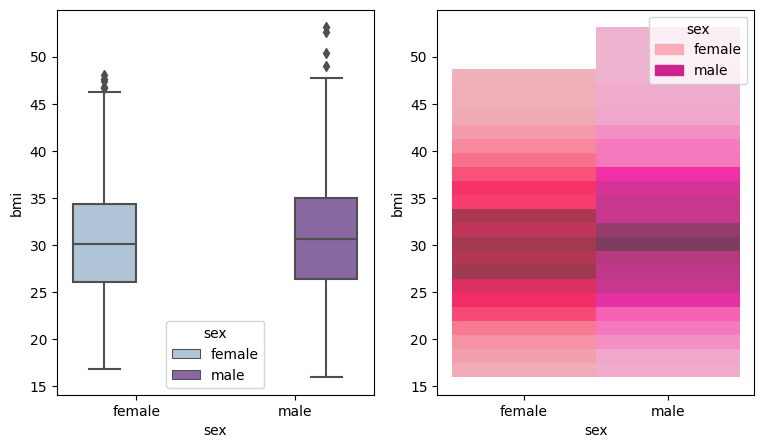

In [312]:
#Relations between BMI and sex
f, axis = plt.subplots(1, 2, figsize=(9,5))
sns.boxplot(data = medinsurance_data, y = 'bmi', x='sex', hue = 'sex', palette ='BuPu', ax=axis[0])
sns.histplot(data=medinsurance_data,x='sex', y='bmi',hue='sex', palette ='RdPu', ax=axis[1])
plt.show()

#we can see that bmi median of men are higher than women's. Their average is close but men are slightly higher.
#Bmi of men is distributed with increasing intensity until it reaches median.
#Bmi of women are distributed heterogeneously between upper and lower limit.

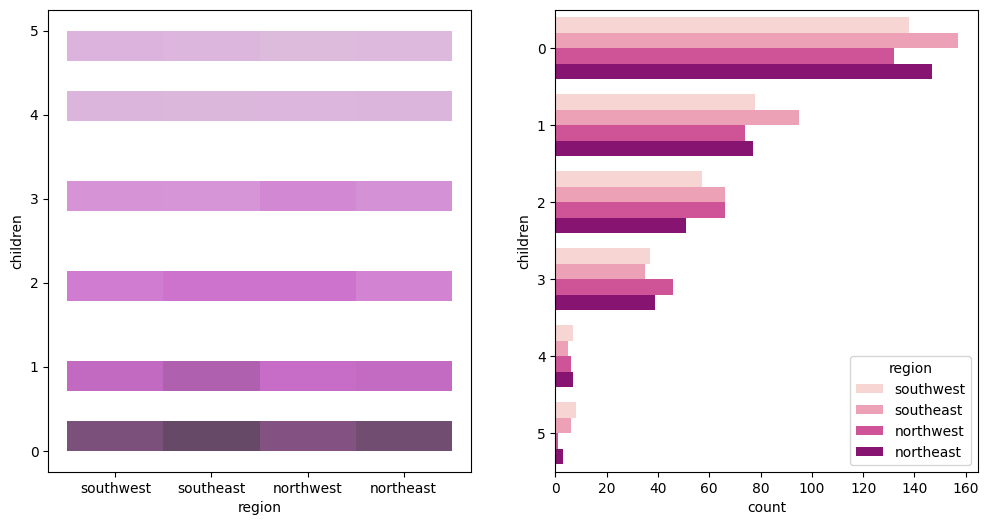

In [313]:
#Children in Regions
f, axis = plt.subplots(1,2, figsize = (12,6))
sns.histplot(medinsurance_data, x='region', y='children', element='steps', color='plum', ax = axis[0])
sns.countplot(medinsurance_data,y='children',hue='region', palette='RdPu', ax=axis[1])
plt.show()
#We can see that most of the clients don't have children in all the regions.
#Southeast region is the preceding region in childless category, it also is the least 5 children possesing region.
#Southeast is also the leading region in the one child category. They're on the same level with Northwest at 2 child category.
#As it is in the 2 child category, Northwest is the leading region in 3 child category.
#The number of clients is inversely proportional to number of children clients have.

In [314]:
#Most Children Possesing Region
rgn_chld = medinsurance_data[['region','children']].groupby(['region'])
rgn_chld.sum()
#southeast has the most children

,children
region,
northeast,339
northwest,373
southeast,382
southwest,371


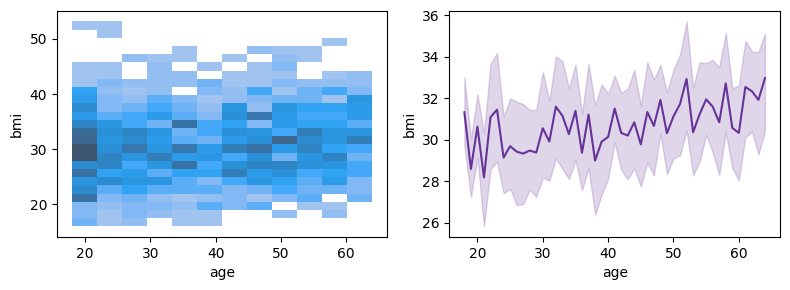

In [316]:
#BMI vs Age
f, axis = plt.subplots(1,2,figsize = (8,3))
sns.histplot(medinsurance_data, x = 'age', y='bmi', ax=axis[0])
sns.lineplot(medinsurance_data, x='age', y='bmi',color='rebeccapurple',ax=axis[1])
f.tight_layout()
#There's a proportional relation between age and bmi.

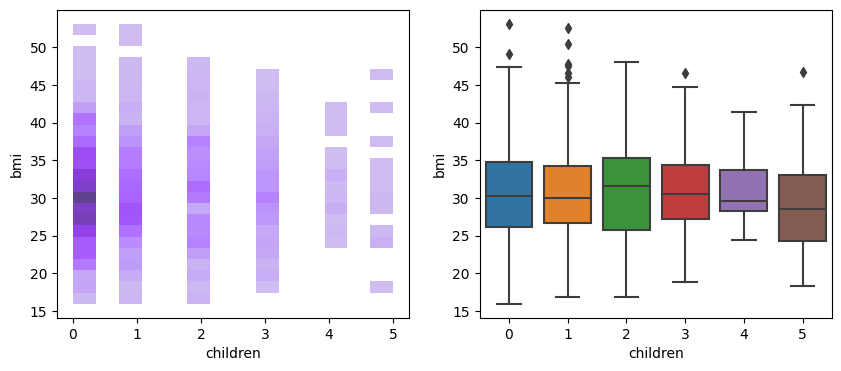

In [317]:
#BMI  vs Children
f, axis  = plt.subplots(1,2,figsize=(10,4))
sns.histplot(medinsurance_data, x ='children', y='bmi',color='indigo', ax=axis[0])
sns.boxplot(medinsurance_data, x='children', y='bmi',ax = axis[1])
plt.show()
#BMI medians don't have a pattern of change according to children number.
#We can again observe that the majority of client base doesn't have much children.

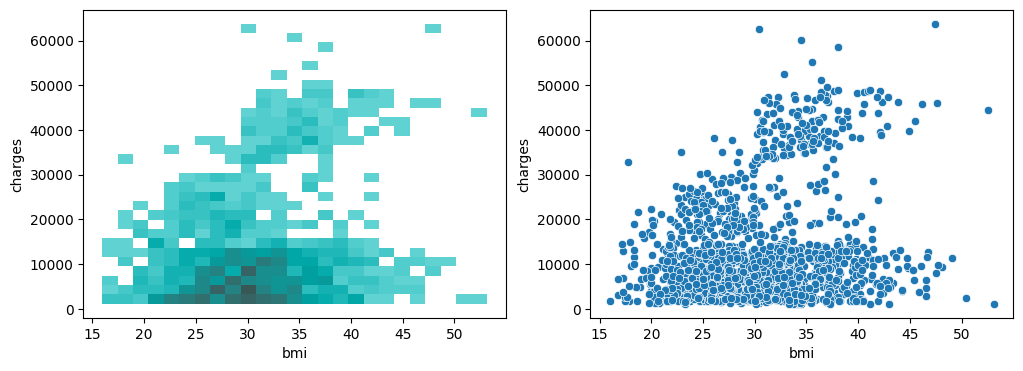

In [318]:
#Effect of BMI on Charges
fig, axis = plt.subplots(1,2,figsize=(12,4))
sns.histplot(medinsurance_data, x='bmi', y='charges',color='teal',ax =axis[0])
sns.scatterplot(medinsurance_data, x='bmi', y='charges', ax = axis[1])
plt.show()
#High BMI doesn't mean high charge,
#but high charges are more likely to be seen with high BMI.
#In 40.000-60.000 charge band, BMI is greater than 30.

<Axes: xlabel='region', ylabel='bmi'>

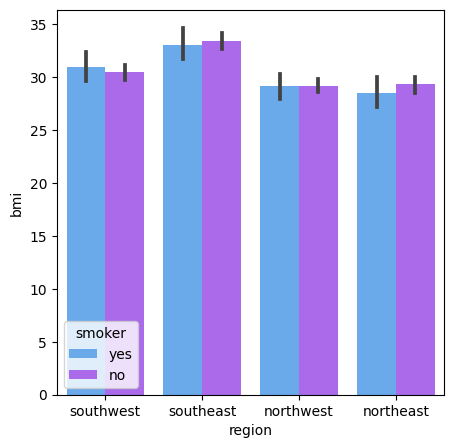

In [319]:
# barplot Region, Smoker, BMI
plt.figure(figsize=(5,5))
sns.barplot(medinsurance_data, x='region', y='bmi',hue='smoker',palette='cool')
#we can see the bmi distribution of smokers and non-smokers according to 4 regions.
#Smoking doesn't seem to be correlated to bmi
#previous histogram analysis is in concord with  bmi vs regions barplot's findings.

In [367]:
#Data Pre-processing

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor

ins_df =medinsurance_data.copy()
#duplicated daata
ins_df = ins_df.drop_duplicates()


In [368]:
#numerical andc categorical encoding:
ins_df['bmi'].skew()
ins_df['age'].skew()
ins_df['sex']=ins_df['sex'].map({'male':0,'female':1})
ins_df['smoker']=ins_df['smoker'].map({'yes':1,'no':0})
ins_df['region']=ins_df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})
ins_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.156784,0.198401
children,0.041536,-0.017848,0.012755,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156784,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,0.010767,1.000000


In [374]:
#Training & Testing
X = ins_df.drop(['charges'],axis = 1)
y = ins_df['charges']

#***
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)
print(X.shape,y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(1337, 6) (1337,)
(1069, 6) (1069,)
(268, 6) (268,)


In [370]:
#Feature Scaling Standard

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X.columns)
display(X_train_std.describe())

X_test_std = std.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X.columns)
display(X_test_std.describe())

,age,sex,bmi,children,smoker,region
count,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03,1.069000e+03
mean,-1.595232e-16,7.643818e-17,-8.640838e-17,6.563713e-17,3.738824e-18,-3.655739e-17
std,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00
min,-1.483598e+00,-9.623545e-01,-2.381828e+00,-9.004055e-01,-5.046730e-01,-1.387657e+00
25%,-9.154058e-01,-9.623545e-01,-7.155436e-01,-9.004055e-01,-5.046730e-01,-4.747921e-01
50%,7.906321e-03,-9.623545e-01,-6.754427e-02,-6.776408e-02,-5.046730e-01,4.380726e-01
75%,8.601944e-01,1.039118e+00,6.730264e-01,7.648773e-01,-5.046730e-01,4.380726e-01
max,1.783507e+00,1.039118e+00,3.654798e+00,3.262801e+00,1.981481e+00,1.350937e+00


,age,sex,bmi,children,smoker,region
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.118153,0.142936,0.030426,0.059618,0.024099,-0.018360
std,0.981661,0.997122,0.952435,1.017514,1.019257,1.043671
min,-1.483598,-0.962354,-2.181256,-0.900405,-0.504673,-1.387657
25%,-0.702334,-0.962354,-0.700115,-0.900405,-0.504673,-1.387657
50%,0.078930,1.039118,0.066035,-0.067764,-0.504673,0.438073
75%,0.931218,1.039118,0.623899,0.764877,-0.504673,1.350937
max,1.783507,1.039118,2.529325,3.262801,1.981481,1.350937


In [372]:
#Feature Scaling MinMax

minmax = MinMaxScaler()

X_train_minmax = minmax.fit_transform(X_train)
X_train_minmax = pd.DataFrame(X_train_minmax, columns=X.columns)
display(X_train_minmax.describe())

X_test_minmax= minmax.transform(X_test)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=X.columns)
display(X_test_minmax.describe())

,age,sex,bmi,children,smoker,region
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,0.454102,0.480823,0.394563,0.216277,0.202993,0.506704
std,0.306225,0.499866,0.165733,0.240312,0.402416,0.365322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.000000,0.276029,0.000000,0.000000,0.333333
50%,0.456522,0.000000,0.383374,0.200000,0.000000,0.666667
75%,0.717391,1.000000,0.506053,0.400000,0.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,age,sex,bmi,children,smoker,region
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.490266,0.552239,0.399603,0.230597,0.212687,0.500000
std,0.300468,0.498194,0.157776,0.244406,0.409973,0.381097
min,0.000000,0.000000,0.033226,0.000000,0.000000,0.000000
25%,0.239130,0.000000,0.278585,0.000000,0.000000,0.000000
50%,0.478261,1.000000,0.405502,0.200000,0.000000,0.666667
75%,0.739130,1.000000,0.497915,0.400000,0.000000,1.000000
max,1.000000,1.000000,0.813559,1.000000,1.000000,1.000000


In [411]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor( max_depth=10,random_state=50)
dec_tree.fit(X_train, y_train)

print('Decision Tree Regressor Train Score: ' , dec_tree.score(X_train, y_train))
print('Decision Tree Regressor Test Score: ' , dec_tree.score(X_test, y_test))
print()
print('***********************************************************************')
print()
ypred = dec_tree.predict(X_test)
print('Decision Tree Regressor Prediction:')
print( ypred[:20])

Decision Tree Regressor Train Score:  0.9729375184002897
Decision Tree Regressor Test Score:  0.8152982076344083

***********************************************************************

Decision Tree Regressor Prediction:
[11933.57753273 23082.95533    14264.19071     1737.1258
 12362.92469906 18765.87545     9645.85895    35491.64
  2738.51111722 46200.9851     41919.097      12480.36031667
  5884.79443333 16734.808875   10372.67087333 11709.9931255
  4561.1885     24180.9335     19023.26       14310.734025  ]


In [416]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rnd_for= RandomForestRegressor( max_depth=10,random_state=50)
rnd_for.fit(X_train, y_train)

print('Random Forest Regressor Train Score: ' , rnd_for.score(X_train, y_train))
print('Random Forest Regressor Test Score: ' , rnd_for.score(X_test, y_test))
print()
print('***********************************************************************')
print()
ypred = rnd_for.predict(X_test)
print('Random Forest Regressor Prediction:')
print( ypred[:20])

Random Forest Regressor Train Score:  0.9625758786853001
Random Forest Regressor Test Score:  0.9076486310312493

***********************************************************************

Random Forest Regressor Prediction:
[11328.60775206  5999.1631504  14357.84667885  1748.23472295
 13030.90815434 18874.86832059 10028.85836079 39870.88405997
  2593.88421758 46598.22940853 41659.39698265 13297.82744012
  6168.81294962 17847.50835544  4737.34221625 15212.82801216
  4944.50964659 24231.83006665 19770.12212769 14059.89767963]


In [417]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor( max_depth=10,random_state=50)
gb.fit(X_train, y_train)

print('Gradient Boosting Regressor Train Score: ' , gb.score(X_train, y_train))
print('Gradient Boosting Regressor Test Score: ' , gb.score(X_test, y_test))
print()
print('***********************************************************************')
print()
ypred = gb.predict(X_test)
print('Gradient Boosting Regressor Prediction:')
print( ypred[:20])

Gradient Boosting Regressor Train Score:  0.9987996899409827
Gradient Boosting Regressor Test Score:  0.8788719613269786

***********************************************************************

Gradient Boosting Regressor Prediction:
[ 8747.73815109  9845.00634116 13931.285393    1744.65618739
 13055.71869682 17426.23930455  9894.37888772 36355.7929769
  2530.99554645 46053.61613789 41232.33043233 12779.46721558
  6154.72024368 17010.74603587  7471.17772925 12578.06078791
  4711.47878838 24590.13462013 19621.13337382 13823.60707376]


In [ ]:
#By for, Gradient Boosting Regressor Model had the best score.
#XGB is also very similar as we'll see

In [450]:
#EVALOUTION
from sklearn.metrics import r2_score

In [449]:
from xgboost.sklearn import XGBRegressor

finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(X_train,y_train)
ypredtrain4=finalmodel.predict(X_train)
ypredtest4=finalmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(finalmodel,X,y,cv=5,).mean())


0.8705488005683217
0.9176402284629371
0.8600710679082143
